# Distribution of order parameter

In [6]:
import numpy as np, glob
import matplotlib.pylab as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import glob

/var/folders/gk/bdqkskqj2fv8dk9kgrxm5psh0000gn/T/ipykernel_28762/1921103273.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [7]:
ice='IceII_2000atm/'
liquid='Liquid_2000atm/'

### Overlap between distributions

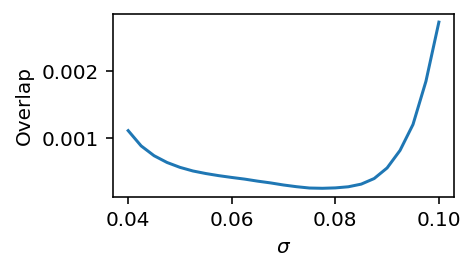

In [8]:
data=np.loadtxt('overlap_1000atm.dat')

plt.figure(figsize=(3.4,2))
plt.plot(data[:,0],data[:,1])
plt.xlabel(r'$\sigma$')
plt.ylabel('Overlap')
plt.tight_layout()

In [9]:
sigma_min=data[data[:,1]==min(data[:,1])][0][0]
print('Minimum overlap for sigma = {}'.format(sigma_min))

Minimum overlap for sigma = 0.0775


### Distributions

In [10]:
hist_liquid = np.loadtxt(liquid+'/Histo_{}'.format(sigma_min))
hist_ice = np.loadtxt(ice+'/Histo_{}'.format(sigma_min))


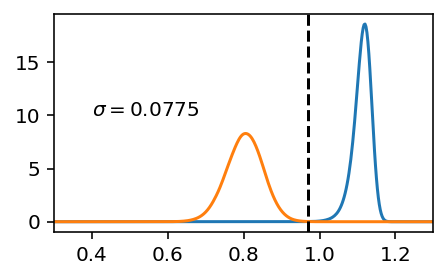

In [11]:
plt.figure(figsize=(3.4,2))
plt.plot(hist_ice[:,0],hist_ice[:,1])
plt.plot(hist_liquid[:,0],hist_liquid[:,1])
plt.xlim([0.3,1.3])
plt.annotate(r'$\sigma={}$'.format(sigma_min),(0.4,10))

diff_val = np.abs(hist_liquid[:,1]-hist_ice[:,1])
diff_bin = hist_liquid[:,0]
diff_val = diff_val[(diff_bin>0.65) * (diff_bin<1.05)]
diff_bin = diff_bin[(diff_bin>0.65) * (diff_bin<1.05)]

min_order= diff_bin[diff_val.min()==diff_val]
plt.axvline(x=min_order, color='k', linestyle='--')

In [12]:
print('Liquid max:', hist_liquid[hist_liquid[:,1]==hist_liquid[:,1].max()][0][0])

Liquid max: 0.805


In [13]:
print('ice max:', hist_ice[hist_ice[:,1]==hist_ice[:,1].max()][0][0])

ice max: 1.12


In [14]:
print('Midpoint between distribitions:', min_order[0])

Midpoint between distribitions: 0.97


In [17]:
for p in ['1000','2000','4000','5000']:
    ice='IceII_{}atm/'.format(p)
    liquid='Liquid_{}atm/'.format(p)
    max_v=hist_ice[hist_ice[:,1]==hist_ice[:,1].max()][0][0]
    min_v=hist_liquid[hist_liquid[:,1]==hist_liquid[:,1].max()][0][0]
    hist_liquid = np.loadtxt(liquid+'/Histo_{}'.format(sigma_min))
    hist_ice = np.loadtxt(ice+'/Histo_{}'.format(sigma_min))
    diff_val = np.abs(hist_liquid[:,1]-hist_ice[:,1])
    diff_bin = hist_liquid[:,0]
    diff_val = diff_val[(diff_bin>min_v) * (diff_bin<max_v)]
    diff_bin = diff_bin[(diff_bin>min_v) * (diff_bin<max_v)]
    min_order= diff_bin[diff_val.min()==diff_val]
    print(p)
    print('Liquid max:', hist_liquid[hist_liquid[:,1]==hist_liquid[:,1].max()][0][0])
    print('ice max:', hist_ice[hist_ice[:,1]==hist_ice[:,1].max()][0][0])
    print('Midpoint between distribitions:', min_order[0])


1000
Liquid max: 0.7675
ice max: 1.1175
Midpoint between distribitions: 0.96
2000
Liquid max: 0.805
ice max: 1.12
Midpoint between distribitions: 0.97
4000
Liquid max: 0.8475
ice max: 1.125
Midpoint between distribitions: 0.9925
5000
Liquid max: 0.8625
ice max: 1.1275
Midpoint between distribitions: 1.0025
